In [1]:
from decimal import *
getcontext().prec = 8

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import csv

In [4]:
DOLLARS_PER_NEO = 30
DOLLARS_PER_NEOGAS = 6

DOLLARS_PER_ETHER = 4300
DOLLARS_PER_GWEI = DOLLARS_PER_ETHER / (10**9)
DOLLARS_PER_WEI = DOLLARS_PER_GWEI / (10*9)
GWEI_PER_ETHGAS = 110 #(gwei)
DOLLAR_PER_ETHGAS = (GWEI_PER_ETHGAS * DOLLARS_PER_ETHER) / (10**9)

In [5]:
ethFormerPayoutFilename = 'evaluation_results/eth/formerPayout.csv'

ethBatchPayoutFilename = 'evaluation_results/eth/batchPayout.csv'
ethWithdrawFilename = 'evaluation_results/eth/withdraw.csv'

neoBatchPayoutFilename = 'evaluation_results/neo/batchPayout-int64.csv'
neoBatchPayoutPresetFilename = 'evaluation_results/neo/batchPayout-int64-preset.csv'
neoWithdrawSignatureFilename = 'evaluation_results/neo/withdraw-signature.csv'
neoWithdrawWitnessFilename = 'evaluation_results/neo/withdraw-witness.csv'

In [6]:
# Read Former Payout Information
formerAccounts = []
formerFillGas = []
formerFillPresetGas = []

i = 0
with open(ethFormerPayoutFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i == 1:
            continue
        if i == 2:
            formerReleaseGas = int(row[0].split('=')[1])
            continue
        formerAccounts.append(int(row[0]))
        formerFillGas.append(int(row[1]))
        formerFillPresetGas.append(int(row[2]))

# Post:
# formerReleaseGas
# formerAccounts[]
# formerFillGas[]
# formerFillPresetGas[]

In [7]:
# Read Ethereum Payout Information

# batch
ethAccounts = []
ethBatchTotalGas = []
ethBatchPerAccountGas = []

ethBatchPresetTotalGas = []
ethBatchPresetPerAccountGas = []

i = 0
with open(ethBatchPayoutFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i == 1:
            continue
        ethAccounts.append(int(row[0]))
        ethBatchTotalGas.append(int(row[1]))
        ethBatchPerAccountGas.append(int(row[2]))
        ethBatchPresetTotalGas.append(int(row[3]))
        ethBatchPresetPerAccountGas.append(int(row[4]))

# withdraw (retrieve the highest estimated gas)
i = 0
ethWithdrawGas = 0
ethWithdrawPresetGas = 0
with open(ethWithdrawFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i == 1:
            continue
        currentWithdrawGas = int(row[1])
        currentWithdrawPresetGas = int(row[2])
        if currentWithdrawGas > ethWithdrawGas:
            ethWithdrawGas = currentWithdrawGas
        if currentWithdrawPresetGas > ethWithdrawPresetGas:
            ethWithdrawPresetGas = currentWithdrawPresetGas

# Post:
#
# ethAccounts[]
# ethBatchTotalGas[]
# ethBatchPerAccountGas[]
#
# ethBatchPresetTotalGas[]
# ethBatchPresetPerAccountGas[]
#
# ethWithdrawGas
# ethWithdrawPresetGas

In [8]:
# Ethereum Calculate USD
ethBatchTotalUSD = []
ethBatchPerAccountUSD = []

ethBatchPresetTotalUSD = []
ethBatchPresetPerAccountUSD = []

for i in range(len(ethAccounts)):
    ethBatchTotalUSD.append(ethBatchTotalGas[i] * DOLLAR_PER_ETHGAS)
    ethBatchPerAccountUSD.append(ethBatchPerAccountGas[i] * DOLLAR_PER_ETHGAS)
    
    ethBatchPresetTotalUSD.append(ethBatchPresetTotalGas[i] * DOLLAR_PER_ETHGAS)
    ethBatchPresetPerAccountUSD.append(ethBatchPresetPerAccountGas[i] * DOLLAR_PER_ETHGAS)

ethWithdrawUSD = ethWithdrawGas * DOLLAR_PER_ETHGAS
ethWithdrawPresetUSD = ethWithdrawPresetGas * DOLLAR_PER_ETHGAS

# Post:
#
# ethBatchTotalUSD = []
# ethBatchPerAccountUSD = []
#
# ethBatchPresetTotalUSD = []
# ethBatchPresetPerAccountUSD = []
#
# ethWithdrawUSD
# ethWithdrawPresetUSD

In [9]:
# Read Neo N3 Payout Information
# (only int64 based information)

# batch
neoAccounts = []
neoBatchTotalGas = []
neoBatchPerAccountGas = []

neoBatchPresetTotalGas = []
neoBatchPresetPerAccountGas = []

# batch (no preset)
i = 0
with open(neoBatchPayoutFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i <= 5:
            continue
        neoAccounts.append(int(row[0]))
        neoBatchTotalGas.append(float(row[1]))
        neoBatchPerAccountGas.append(float(row[2]))

# batch (with preset)
i = 0
with open(neoBatchPayoutPresetFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i <= 6:
            continue
        neoBatchPresetTotalGas.append(float(row[1]))
        neoBatchPresetPerAccountGas.append(float(row[2]))

        
# withdraw signature
i = 0
with open(neoWithdrawSignatureFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i <= 4:
            continue
        if i == 5:
            neoWithdrawSignatureInt32Gas = float(row[2])
        if i == 6:
            neoWithdrawSignatureInt64Gas = float(row[2])
        if i == 7:
            neoWithdrawSignatureInt32PresetGas = float(row[2])
        if i == 9:
            neoWithdrawSignatureInt64PresetGas = float(row[2])

i = 0
with open(neoWithdrawWitnessFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i <= 4:
            continue
        if i == 5:
            neoWithdrawWitnessInt32Gas = float(row[2])
        if i == 6:
            neoWithdrawWitnessInt64Gas = float(row[2])
        if i == 7:
            neoWithdrawWitnessInt32PresetGas = float(row[2])
        if i == 9:
            neoWithdrawWitnessInt64PresetGas = float(row[2])

# Post:
#
# neoAccounts = []
# neoBatchTotalGas = []
# neoBatchPerAccountGas = []
#
# neoBatchPresetTotalGas = []
# neoBatchPresetPerAccountGas = []
#
# neoWithdrawSignatureInt32Gas
# neoWithdrawSignatureInt32PresetGas
# neoWithdrawSignatureInt64Gas
# neoWithdrawSignatureInt64PresetGas
#
# neoWithdrawWitnessInt32Gas
# neoWithdrawWitnessInt32PresetGas
# neoWithdrawWitnessInt64Gas
# neoWithdrawWitnessInt64PresetGas

In [10]:
# Ethereum Calculate USD
neoBatchTotalUSD = []
neoBatchPerAccountUSD = []

neoBatchPresetTotalUSD = []
neoBatchPresetPerAccountUSD = []

for i in range(len(neoAccounts)):
    neoBatchTotalUSD.append(neoBatchTotalGas[i] * DOLLARS_PER_NEOGAS)
    neoBatchPerAccountUSD.append(neoBatchPerAccountGas[i] * DOLLARS_PER_NEOGAS)

    neoBatchPresetTotalUSD.append(neoBatchPresetTotalGas[i] * DOLLARS_PER_NEOGAS)
    neoBatchPresetPerAccountUSD.append(neoBatchPresetPerAccountGas[i] * DOLLARS_PER_NEOGAS)

neoWithdrawSignatureInt32USD = neoWithdrawSignatureInt32Gas * DOLLARS_PER_NEOGAS
neoWithdrawSignatureInt32PresetUSD = neoWithdrawSignatureInt32PresetGas * DOLLARS_PER_NEOGAS
neoWithdrawSignatureInt64USD = neoWithdrawSignatureInt64Gas * DOLLARS_PER_NEOGAS
neoWithdrawSignatureInt64PresetUSD = neoWithdrawSignatureInt64PresetGas * DOLLARS_PER_NEOGAS

neoWithdrawWitnessInt32USD = neoWithdrawWitnessInt32Gas * DOLLARS_PER_NEOGAS
neoWithdrawWitnessInt32PresetUSD = neoWithdrawWitnessInt32PresetGas * DOLLARS_PER_NEOGAS
neoWithdrawWitnessInt64USD = neoWithdrawWitnessInt64Gas * DOLLARS_PER_NEOGAS
neoWithdrawWitnessInt64PresetUSD = neoWithdrawWitnessInt64PresetGas * DOLLARS_PER_NEOGAS

# Post:
#
# neoBatchTotalUSD = []
# neoBatchPerAccountUSD = []
#
# neoBatchPresetTotalUSD = []
# neoBatchPresetPerAccountUSD = []
#
# neoWithdrawSignatureInt32USD
# neoWithdrawSignatureInt32PresetUSD
# neoWithdrawSignatureInt64USD
# neoWithdrawSignatureInt64PresetUSD
#
# neoWithdrawWitnessInt32USD
# neoWithdrawWitnessInt32PresetUSD
# neoWithdrawWitnessInt64USD
# neoWithdrawWitnessInt64PresetUSD

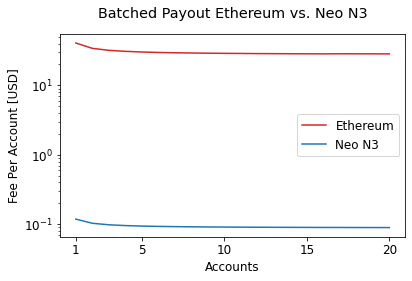

In [103]:
# Plot Ethereum vs. Neo N3 Batched Payout

font = {'size': 12}
plt.rc('font', **font)

safeas = 'batchPayout-eth-vs-neo.pdf'
title = 'Batched Payout Ethereum vs. Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = ethAccounts[:20]
ax1_y = ethBatchPerAccountUSD[:20]
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = neoAccounts[:20]
ax2_y = neoBatchPerAccountUSD[:20]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 21, 5)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 20

plt.plot(ax1_x, ax1_y, color = ax1_color, label = "Ethereum")# marker = 'o', markersize = 1, linestyle = "None", dpi = 400)
plt.plot(ax2_x, ax2_y, color = ax2_color, label = "Neo N3")# marker = 'o', markersize = 1, linestyle = "None", dpi = 400)
plt.xlabel("Accounts")
plt.ylabel("Fee Per Account [USD]")

plt.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
plt.legend()

plt.title(title, y=1.05)
#plt.suptitle(title, y=1.12)
plt.xticks(xaxis_ticks)
plt.yscale('log')
plt.savefig('plots/' + safeas, dpi=400)
plt.show()

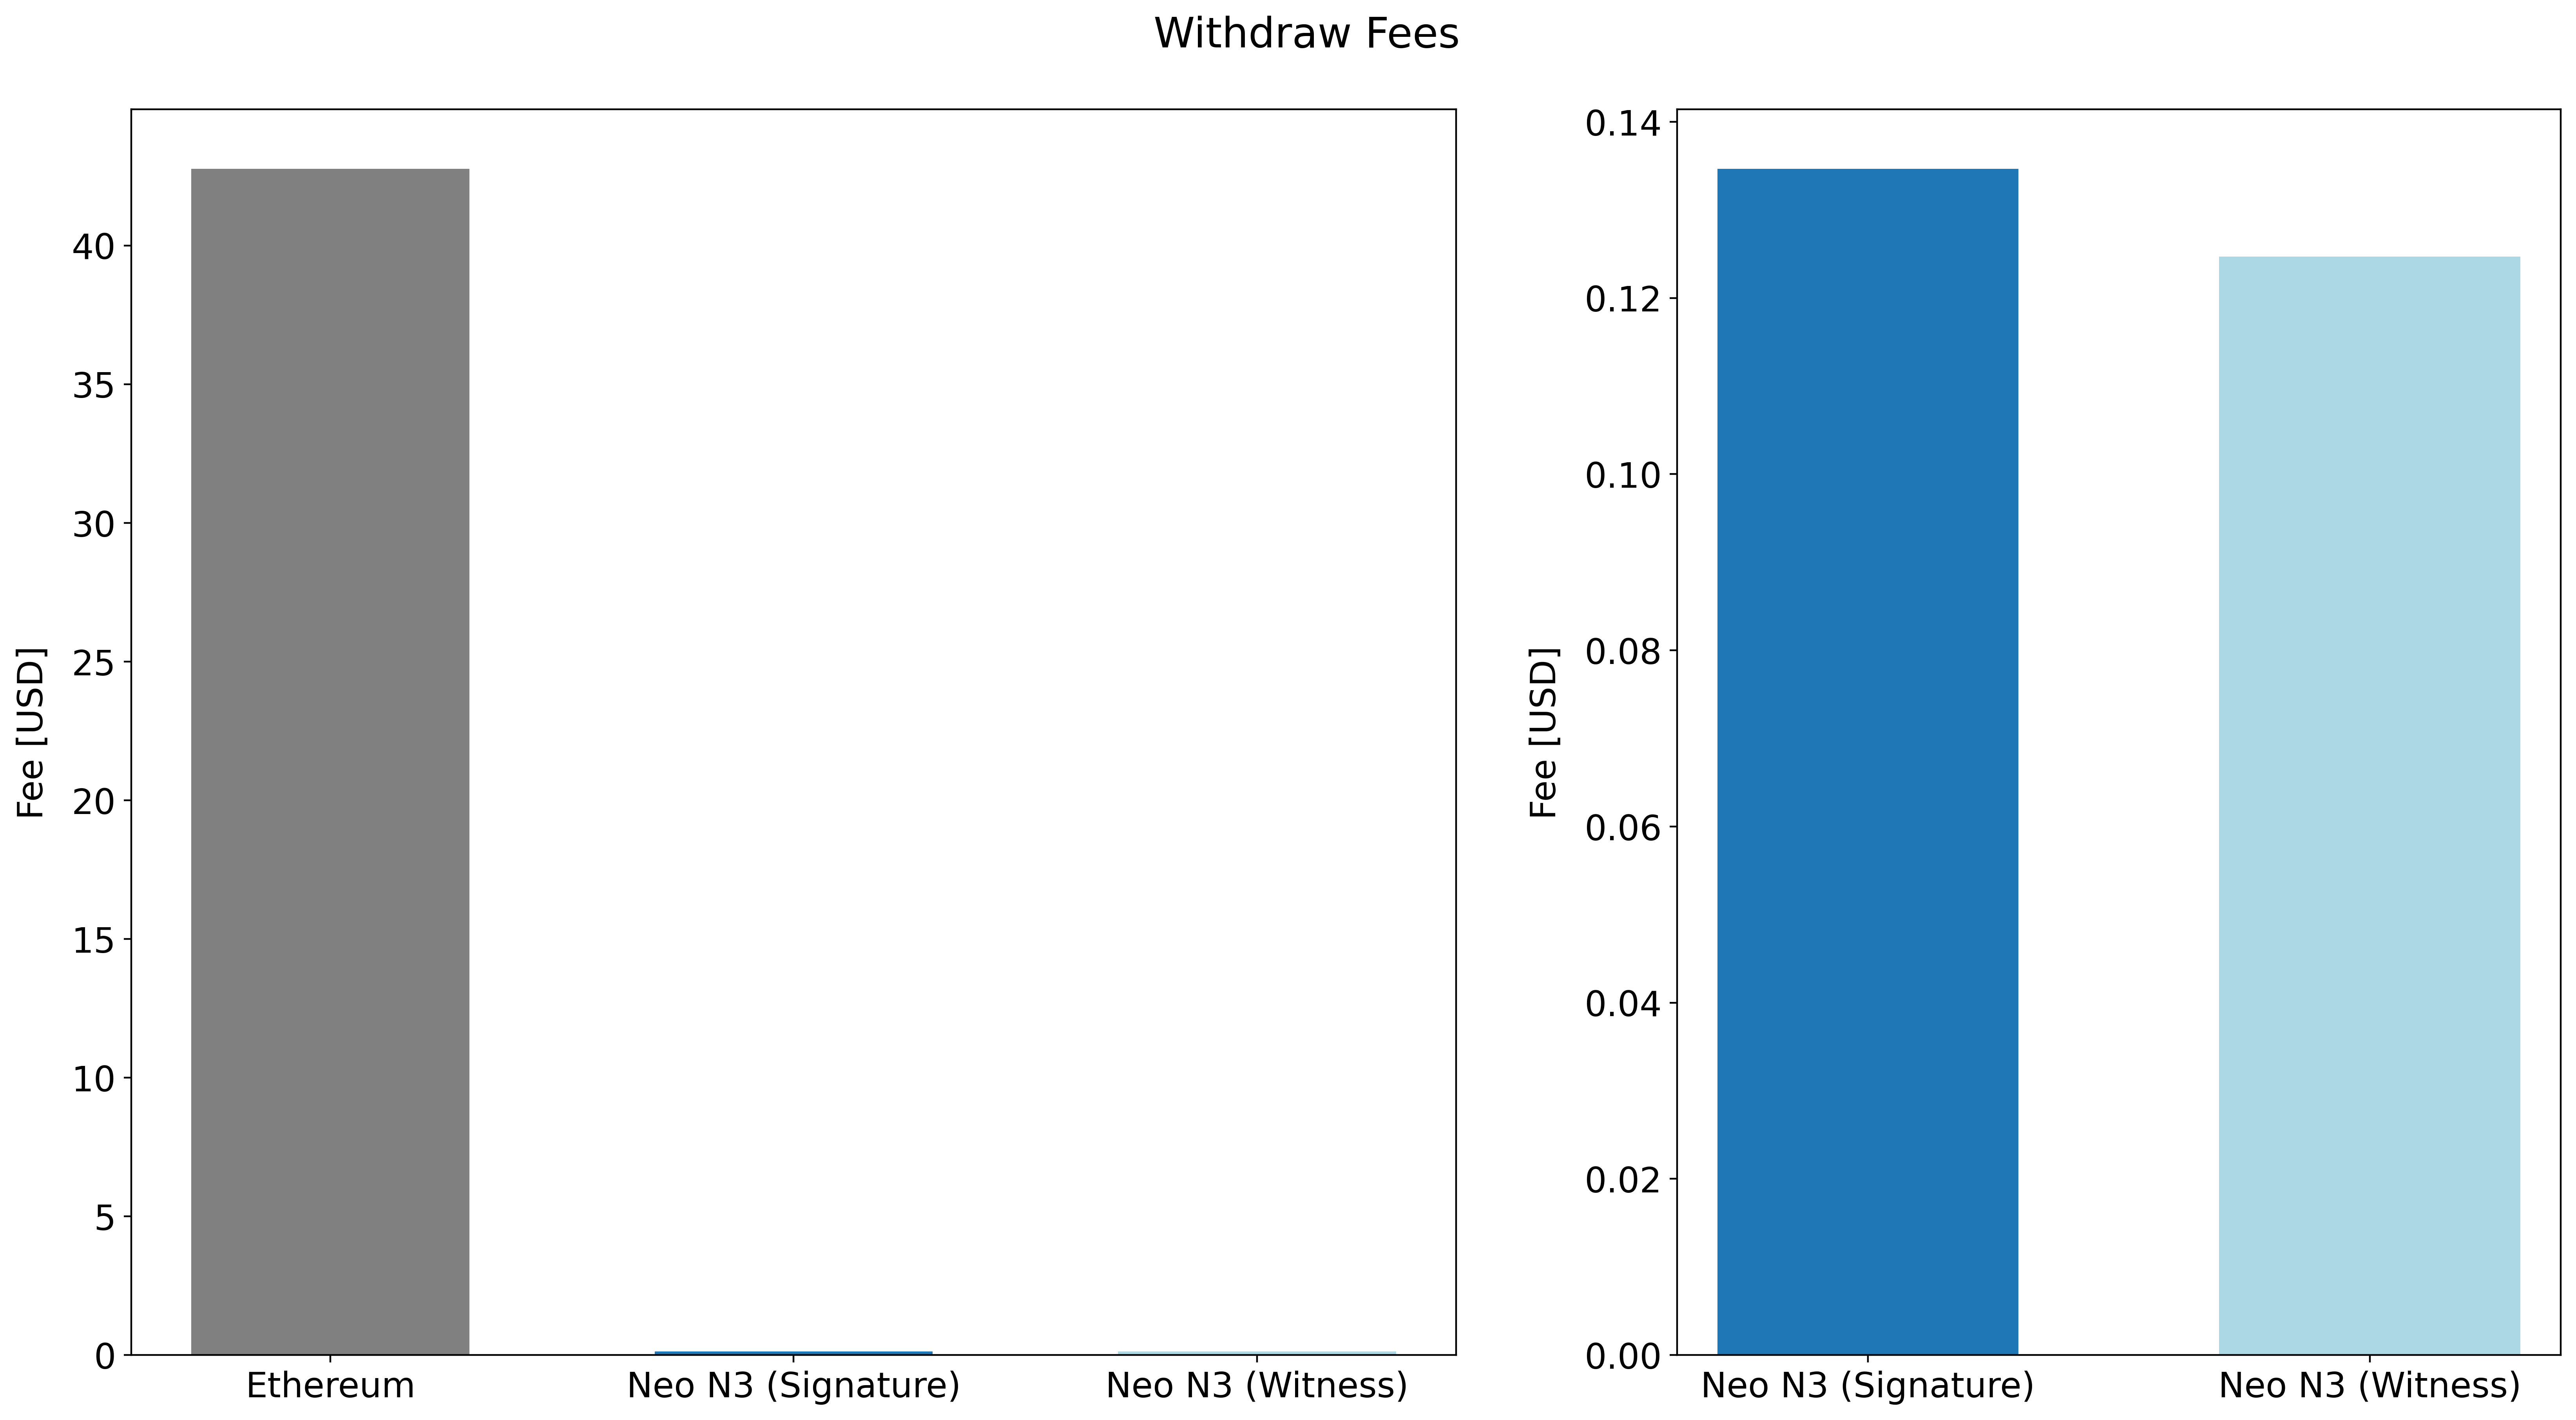

In [119]:
# Plot Withdraw Comparison Ethereum vs. Neo N3 Signature vs. Neo N3 Witness

safeas = 'batchPayout-comparison-eth-neosig-neowitness.pdf'
title = 'Withdraw Fees'

font = {'size': 16}
plt.rc('font', **font)

fig, axes = plt.subplots(1, 2, figsize = (20, 10), gridspec_kw={'width_ratios': [3, 2]}, dpi=400)
fig.subplots_adjust(top=0.92)
bars = []
bars.append(ethWithdrawUSD)
bars.append(neoWithdrawSignatureInt64USD)
bars.append(neoWithdrawWitnessInt64USD)
colors=['grey', 'tab:blue', 'lightblue']
x = np.arange(3)
axLeft = axes[0]
axLeft.bar(x, bars, width = 0.6, color = colors)
axLeft.set_xticks(x)
axLeft.set_xticklabels(['Ethereum', 'Neo N3 (Signature)', 'Neo N3 (Witness)'])
axLeft.set_ylabel('Fee [USD]', labelpad=10)

axRight = axes[1]
neobars = []
neobars.append(neoWithdrawSignatureInt64USD)
neobars.append(neoWithdrawWitnessInt64USD)
colors=['tab:blue', 'lightblue']
x = np.arange(2)
axRight.bar(x, neobars, width = 0.6, color = colors)
axRight.set_xticks(x)
axRight.set_xticklabels(['Neo N3 (Signature)', 'Neo N3 (Witness)'])
axRight.set_ylabel('Fee [USD]', labelpad=10)

plt.suptitle(title)
plt.savefig('plots/' + safeas, dpi=400)
plt.show()

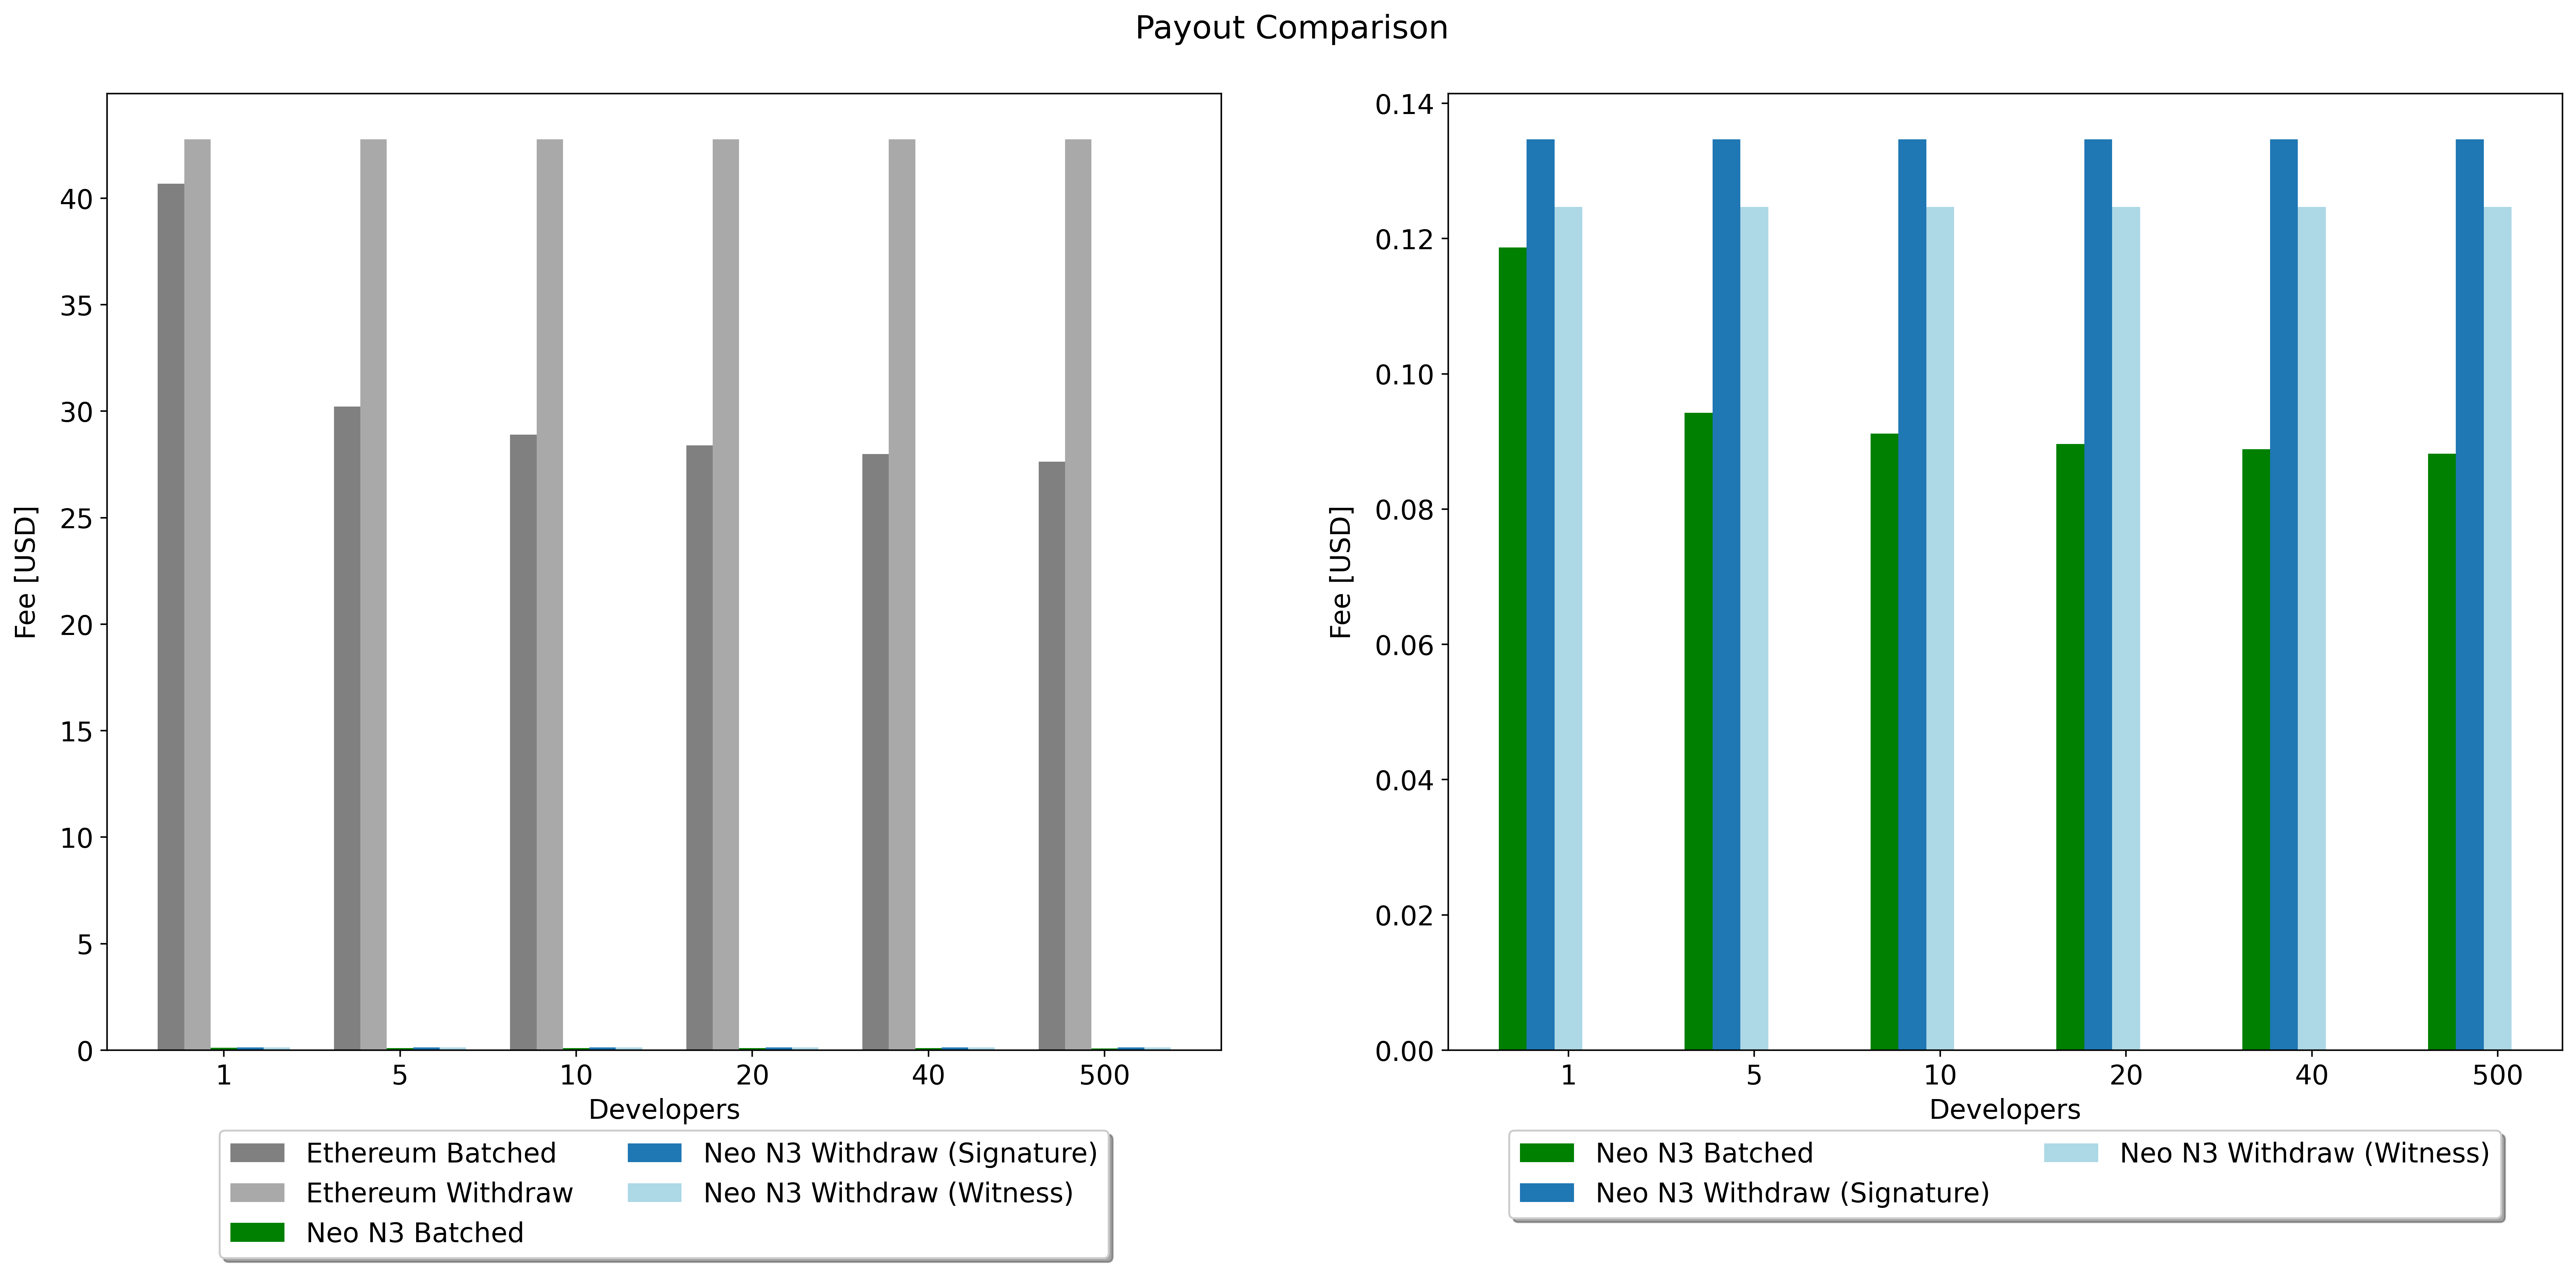

In [120]:
# Multi-bar plot (5/10/20/40 developers) per developer - no preset

multibar_ethBatchUSD = []
multibar_ethWithdrawUSD = []
multibar_neoBatchUSD = []
multibar_neoWithdrawSignatureUSD = []
multibar_neoWithdrawWitnessUSD = []

multibar_ethBatchPresetUSD = []
multibar_ethWithdrawPresetUSD = []
multibar_neoBatchPresetUSD = []
multibar_neoWithdrawSignaturePresetUSD = []
multibar_neoWithdrawWitnessPresetUSD = []

variations = [1, 5, 10, 20, 40, 500]
for i in variations:
    ethIndex = ethAccounts.index(i)
    multibar_ethBatchUSD.append(ethBatchPerAccountUSD[ethIndex])
    multibar_ethBatchPresetUSD.append(ethBatchPresetPerAccountUSD[ethIndex])
    multibar_ethWithdrawUSD.append(ethWithdrawUSD)
    multibar_ethWithdrawPresetUSD.append(ethWithdrawPresetUSD)
    
    neoIndex = neoAccounts.index(i)
    multibar_neoBatchUSD.append(neoBatchPerAccountUSD[neoIndex])
    multibar_neoBatchPresetUSD.append(neoBatchPresetPerAccountUSD[neoIndex])
    multibar_neoWithdrawSignatureUSD.append(neoWithdrawSignatureInt64USD)
    multibar_neoWithdrawSignaturePresetUSD.append(neoWithdrawSignatureInt64PresetUSD)
    multibar_neoWithdrawWitnessUSD.append(neoWithdrawWitnessInt64USD)
    multibar_neoWithdrawWitnessPresetUSD.append(neoWithdrawWitnessInt64PresetUSD)


################

title = 'Payout Comparison'
safeas = 'payout-comparison.pdf'

font = {'size': 14}
plt.rc('font', **font)

fig, axes = plt.subplots(1, 2, figsize = (20, 10), dpi=400)

N = len(variations)
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

axLeft = axes[0]
xticklabels = (str(variations[0]), str(variations[1]), str(variations[2]), str(variations[3]), str(variations[4]), str(variations[5]))

rects1 = axLeft.bar(ind-width, multibar_ethBatchUSD, width, color='grey')
rects2 = axLeft.bar(ind, multibar_ethWithdrawUSD, width, color='darkgrey')
rects3 = axLeft.bar(ind+width, multibar_neoBatchUSD, width, color='green')
rects4 = axLeft.bar(ind+width*2, multibar_neoWithdrawSignatureUSD, width, color='tab:blue')
rects5 = axLeft.bar(ind+width*3, multibar_neoWithdrawWitnessUSD, width, color='lightblue')

axLeft.set_ylabel('Fee [USD]', labelpad=10)
axLeft.set_xticks(ind+width)
axLeft.set_xticklabels(xticklabels)
axLeft.set_xlabel('Developers')
axLeft.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),
              ('Ethereum Batched', 'Ethereum Withdraw', 'Neo N3 Batched', 'Neo N3 Withdraw (Signature)', 'Neo N3 Withdraw (Witness)'),
              loc=9, bbox_to_anchor=(0.5, -0.07), fancybox=True, shadow=True, ncol=2)

axRight = axes[1]

rects3 = axRight.bar(ind-width, multibar_neoBatchUSD, width, color='green')
rects4 = axRight.bar(ind, multibar_neoWithdrawSignatureUSD, width, color='tab:blue')
rects5 = axRight.bar(ind+width, multibar_neoWithdrawWitnessUSD, width, color='lightblue')

axRight.set_ylabel('Fee [USD]', labelpad=10)
axRight.set_xticks(ind+width)
axRight.set_xticklabels(xticklabels)
axRight.set_xlabel('Developers')

axRight.legend((rects3[0], rects4[0], rects5[0]),
              ('Neo N3 Batched', 'Neo N3 Withdraw (Signature)', 'Neo N3 Withdraw (Witness)'),
              loc=9, bbox_to_anchor=(0.5, -0.07), fancybox=True, shadow=True, ncol=2)

plt.tight_layout(pad=4.0)  # otherwise the right y-label is slightly clipped
plt.suptitle(title)
plt.savefig('plots/' + safeas, dpi=400)
plt.show()

In [13]:
def createDoublePlot(safeas, title, xlabel,
                     ax1_ylabel, ax1_x, ax1_y, ax1_color,
                     ax2_ylabel, ax2_x, ax2_y, ax2_color,
                     xaxis_ticks):
    fig, ax1 = plt.subplots(dpi=400)
    color = ax1_color
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ax1_ylabel, color=color)
    ax1.plot(ax1_x, ax1_y, color=color, marker='o', markersize=1, linestyle="None")
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = ax2_color
    ax2.set_ylabel(ax2_ylabel, color=color)  # we already handled the x-label with ax1
    ax2.plot(ax2_x, ax2_y, color=color, marker='o', markersize=1, linestyle="None")
    ax2.tick_params(axis='y', labelcolor=color)
    ax1.set(xticks=xaxis_ticks, title=title)

    fig.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
    plt.savefig('plots/' + safeas)
    plt.show()

In [14]:
def createDoublePlotasdf(safeas, title, xlabel,
                     ax1_ylabel, ax1_x, ax1_y, ax1_color,
                     ax2_ylabel, ax2_x, ax2_y, ax2_color,
                     xaxis_ticks_1, xaxis_ticks_2):
    fig, axes = plt.subplots(1, 2, figsize = (20, 10))
    fig.suptitle(title)
    color = ax1_color
    ax1 = axes[0]
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ax1_ylabel, color=color)
    ax1.plot(ax1_x, ax1_y, color=color, marker='o', markersize=1, linestyle="None")
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = ax2_color
    ax2.set_ylabel(ax2_ylabel, color=color)  # we already handled the x-label with ax1
    ax2.plot(ax2_x, ax2_y, color=color, marker='o', markersize=1, linestyle="None")
    ax2.tick_params(axis='y', labelcolor=color)
    ax1.set(xticks=xaxis_ticks_1)#, title=title)
    
    color = ax1_color
    ax1 = axes[1]
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ax1_ylabel, color=color)
    ax1.plot(ax1_x[:40], ax1_y[:40], color=color, marker='o', markersize=2, linestyle="None")
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = ax2_color
    ax2.set_ylabel(ax2_ylabel, color=color)  # we already handled the x-label with ax1
    ax2.plot(ax2_x[:40], ax2_y[:40], color=color, marker='o', markersize=2, linestyle="None")
    ax2.tick_params(axis='y', labelcolor=color)
    ax1.set(xticks=xaxis_ticks_2)#, title=title)

    fig.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
    plt.savefig('plots/' + safeas, dpi = 400)
    plt.show()

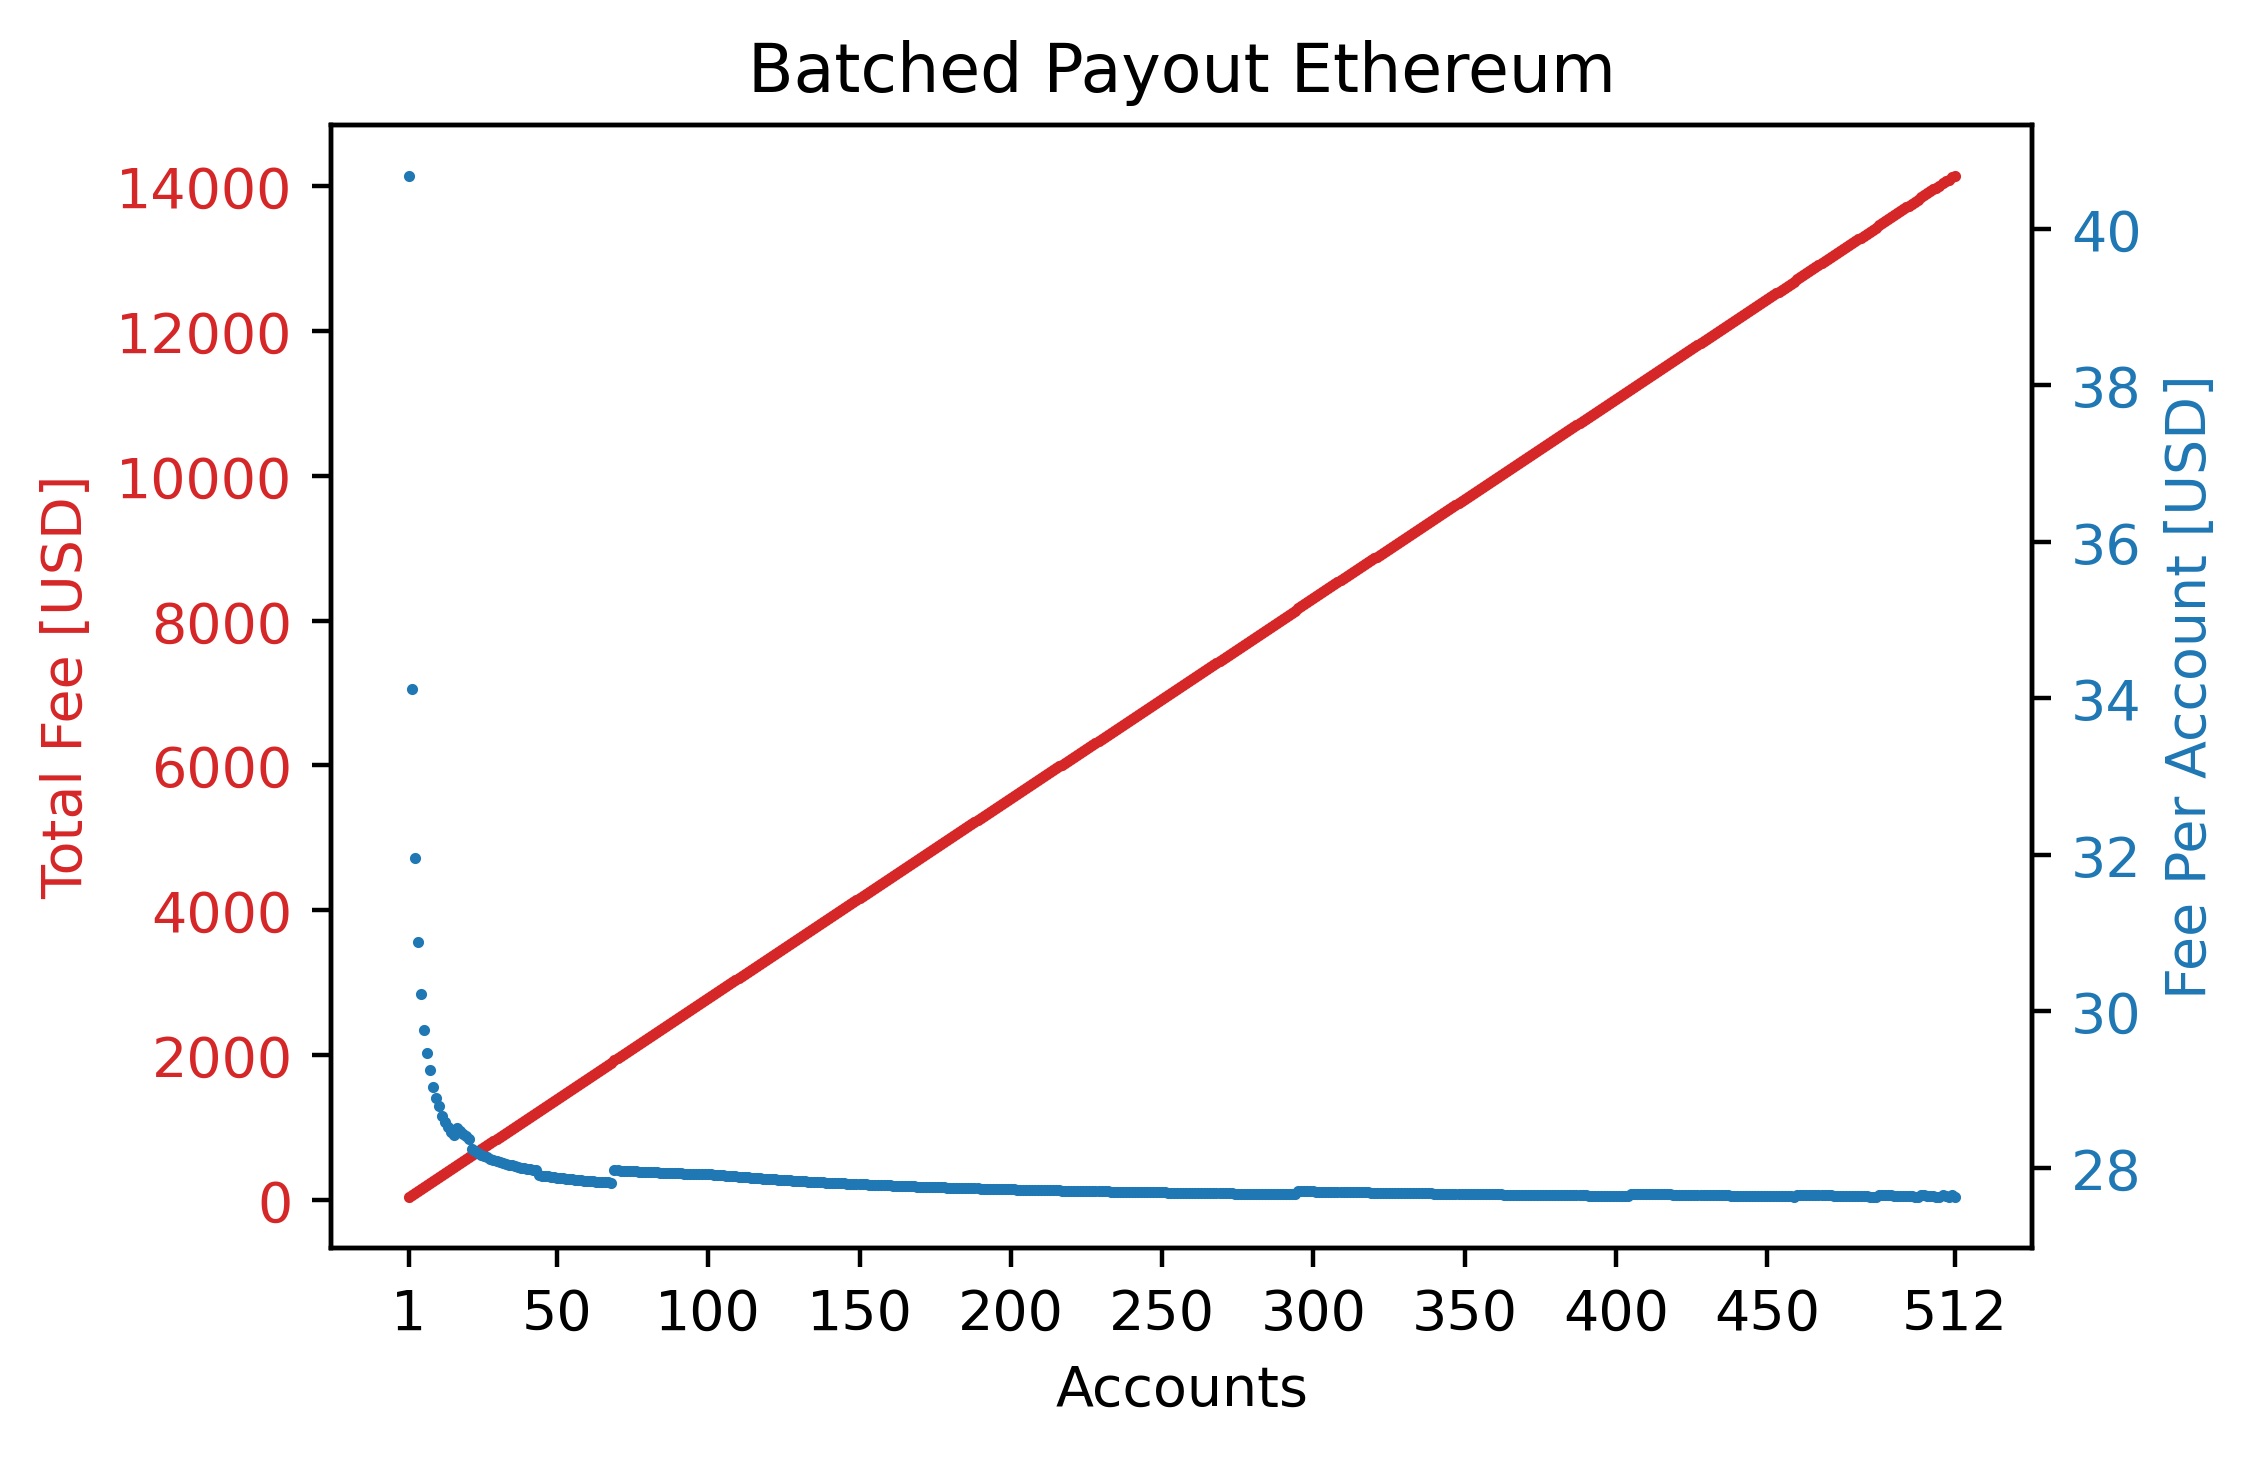

In [15]:
# Plot Ethereum Batched Payout

safeas = 'eth-batchPayout-nodpi.pdf'
title = 'Batched Payout Ethereum'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = ethAccounts
ax1_y = ethBatchTotalUSD
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = ethAccounts
ax2_y = ethBatchPerAccountUSD
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 512, 50)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 512

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

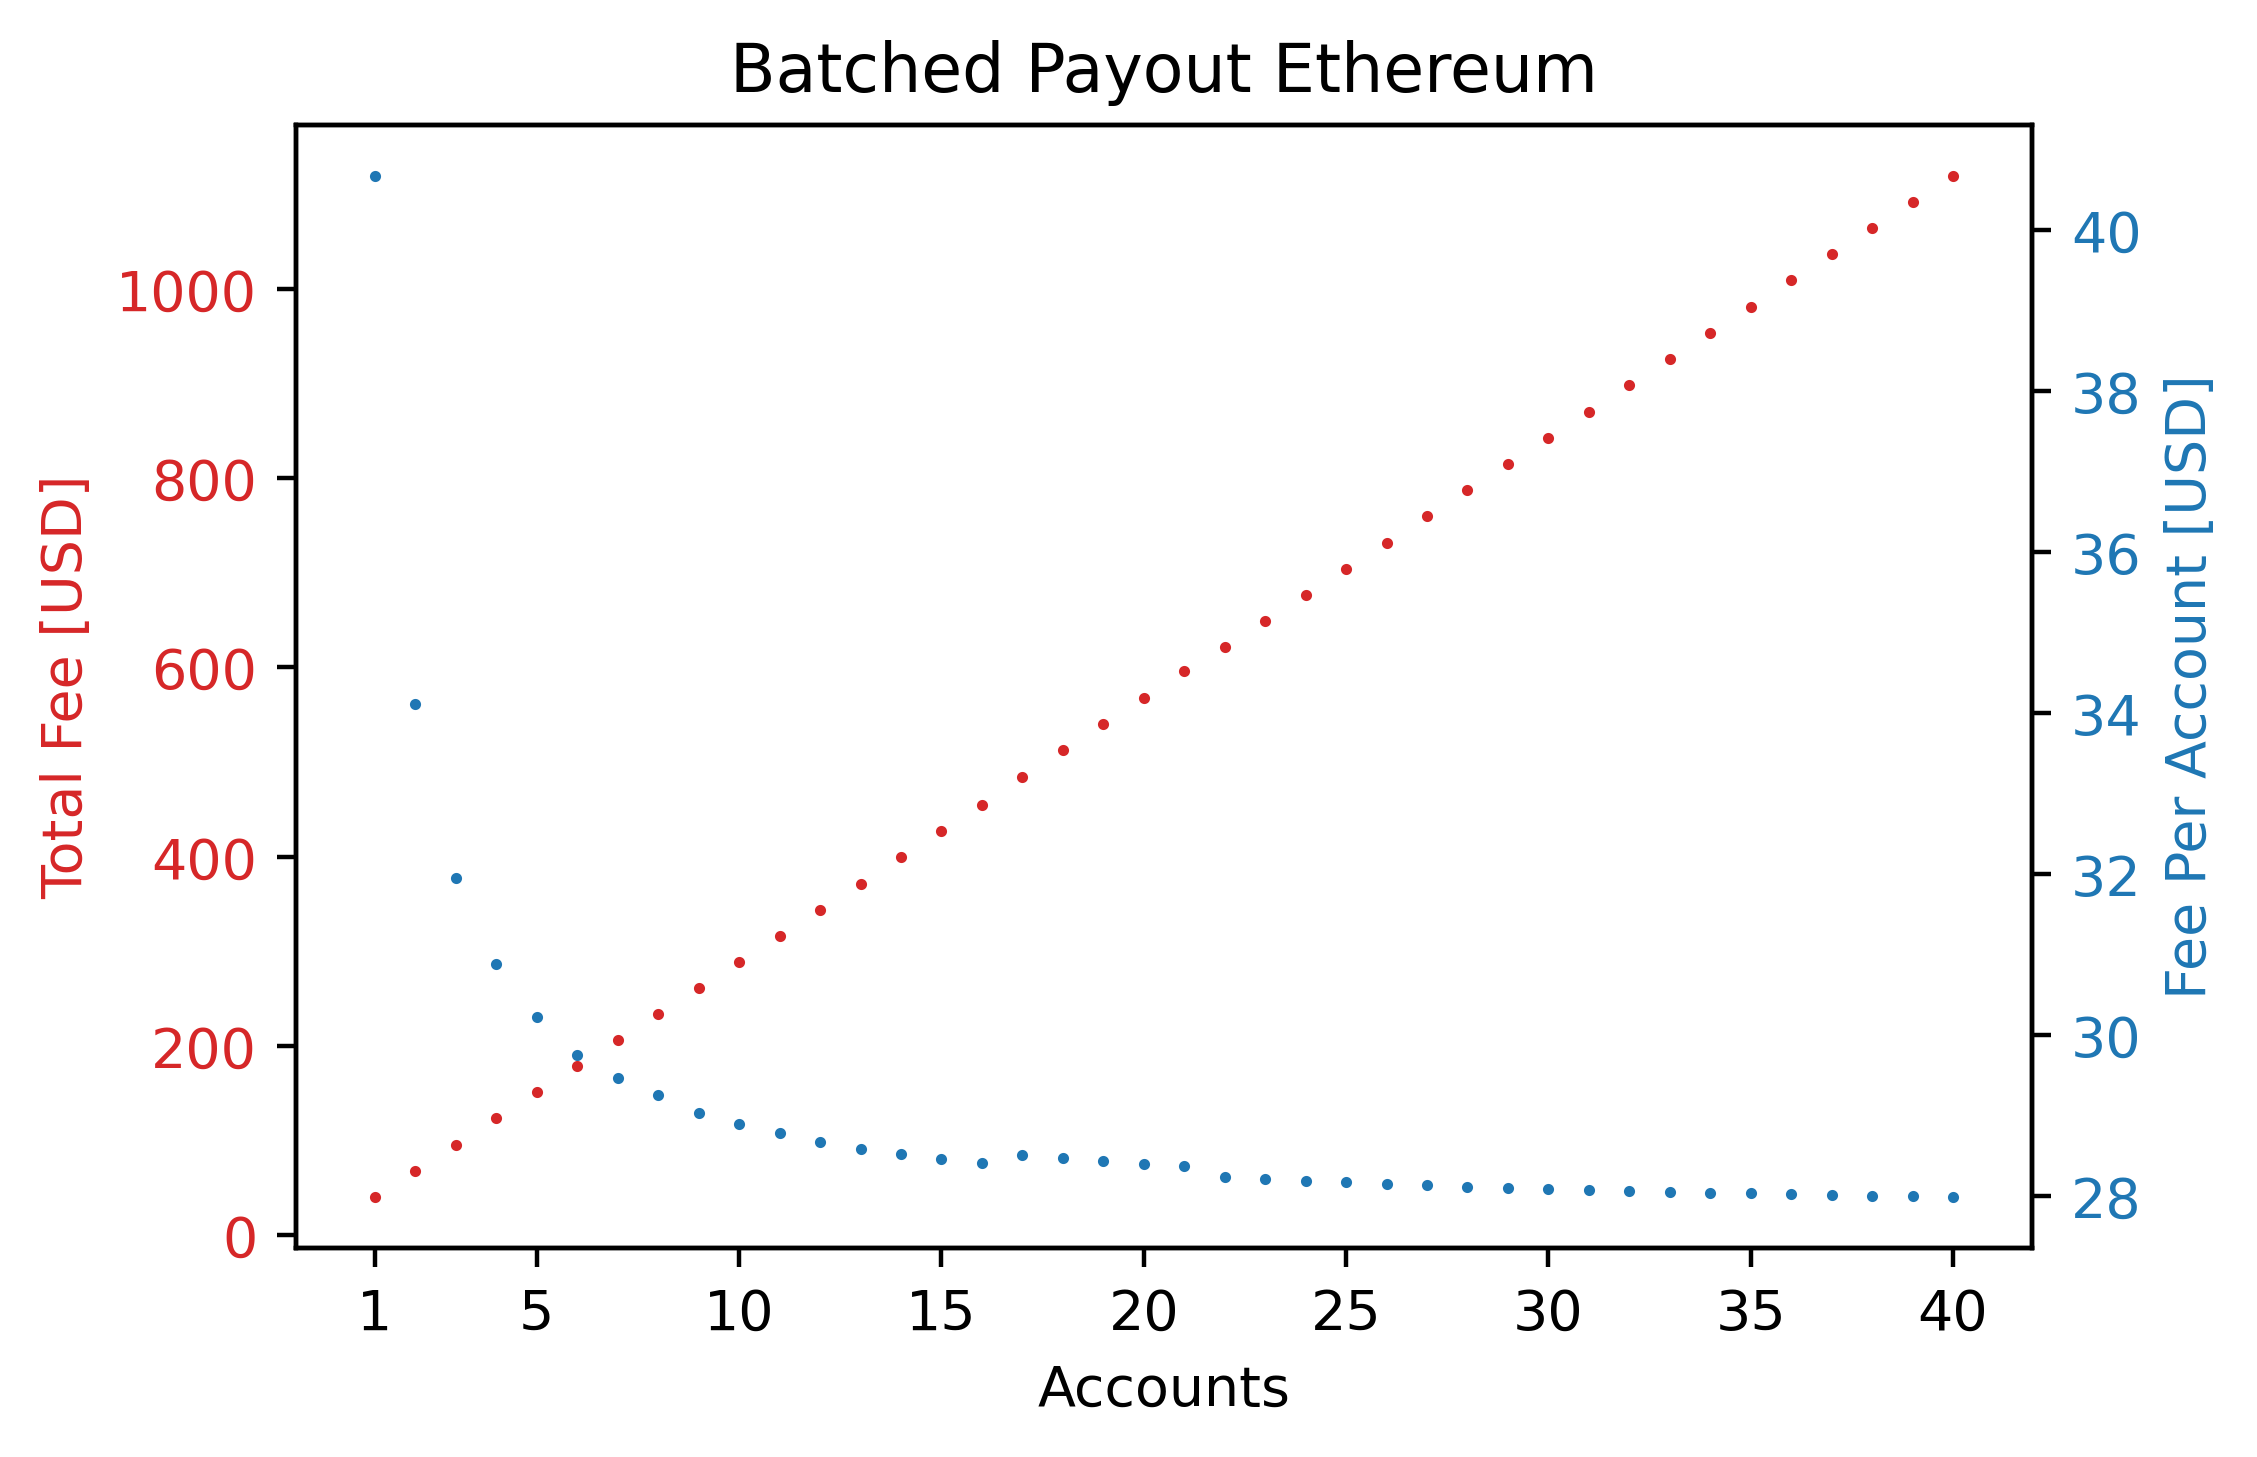

In [16]:
# Plot Ethereum Batched Payout (first 40)

safeas = 'eth-batchPayout-40.pdf'
title = 'Batched Payout Ethereum'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = ethAccounts[:40]
ax1_y = ethBatchTotalUSD[:40]
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = ethAccounts[:40]
ax2_y = ethBatchPerAccountUSD[:40]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 40

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

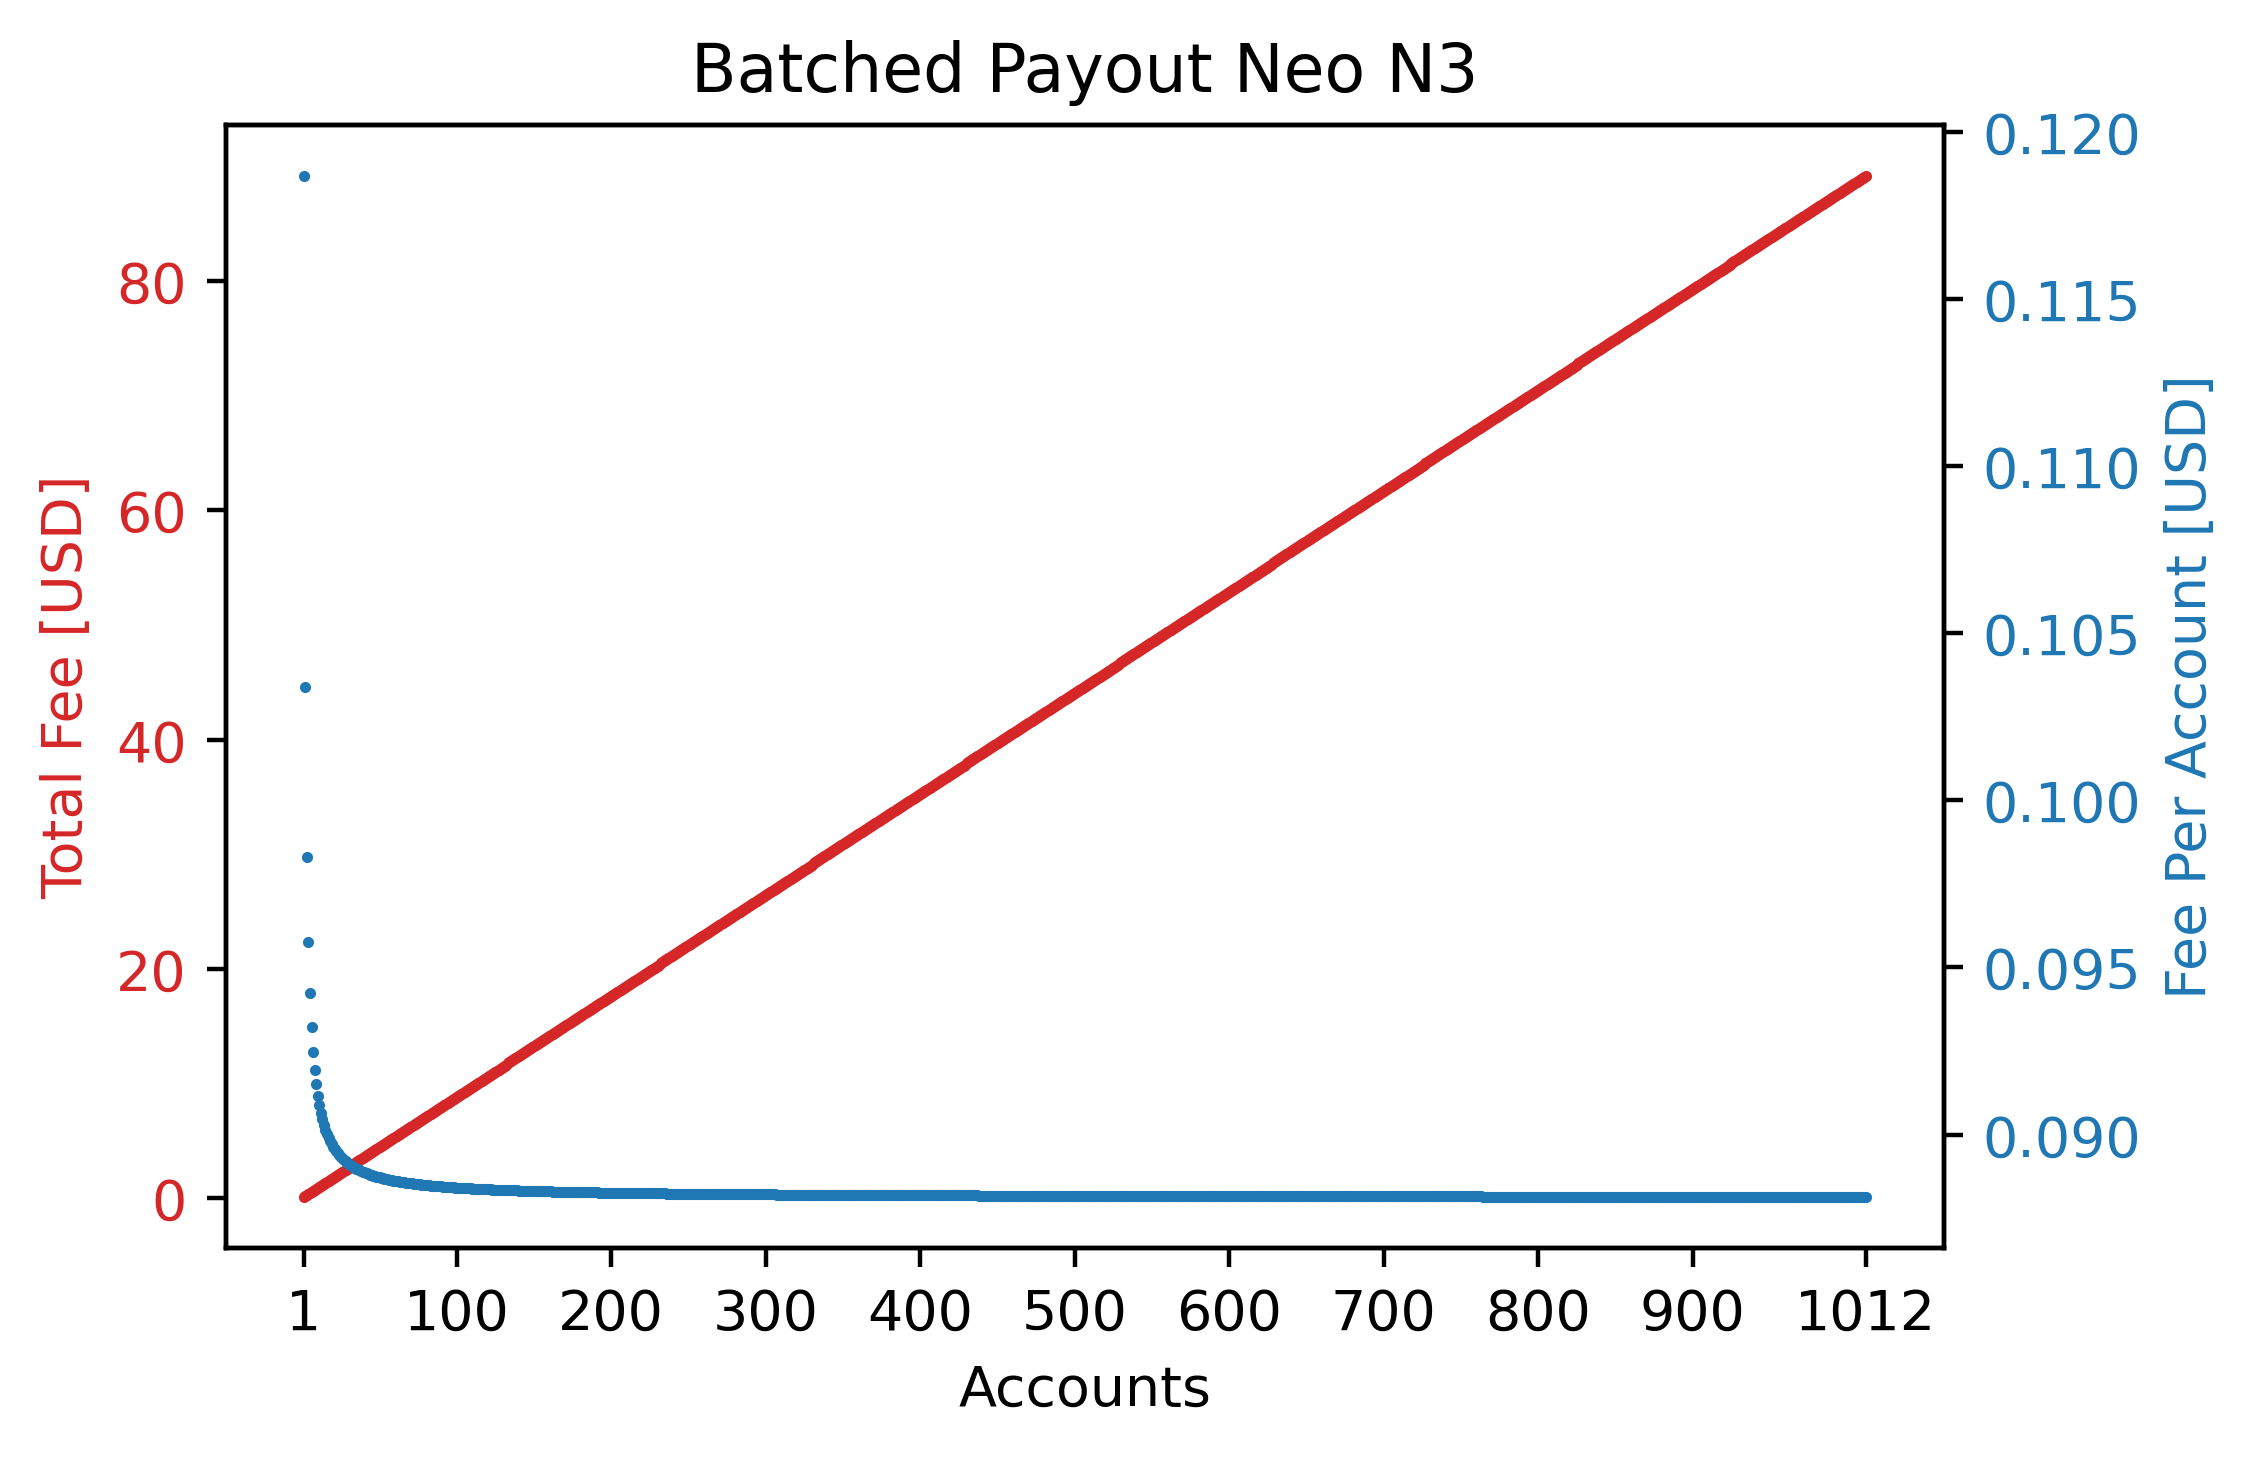

In [17]:
# Plot Neo N3 Batched Payout

safeas = 'neo-batchPayout.pdf'
title = 'Batched Payout Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = neoAccounts
ax1_y = neoBatchTotalUSD
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = neoAccounts
ax2_y = neoBatchPerAccountUSD
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 1012, 100)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 1012

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

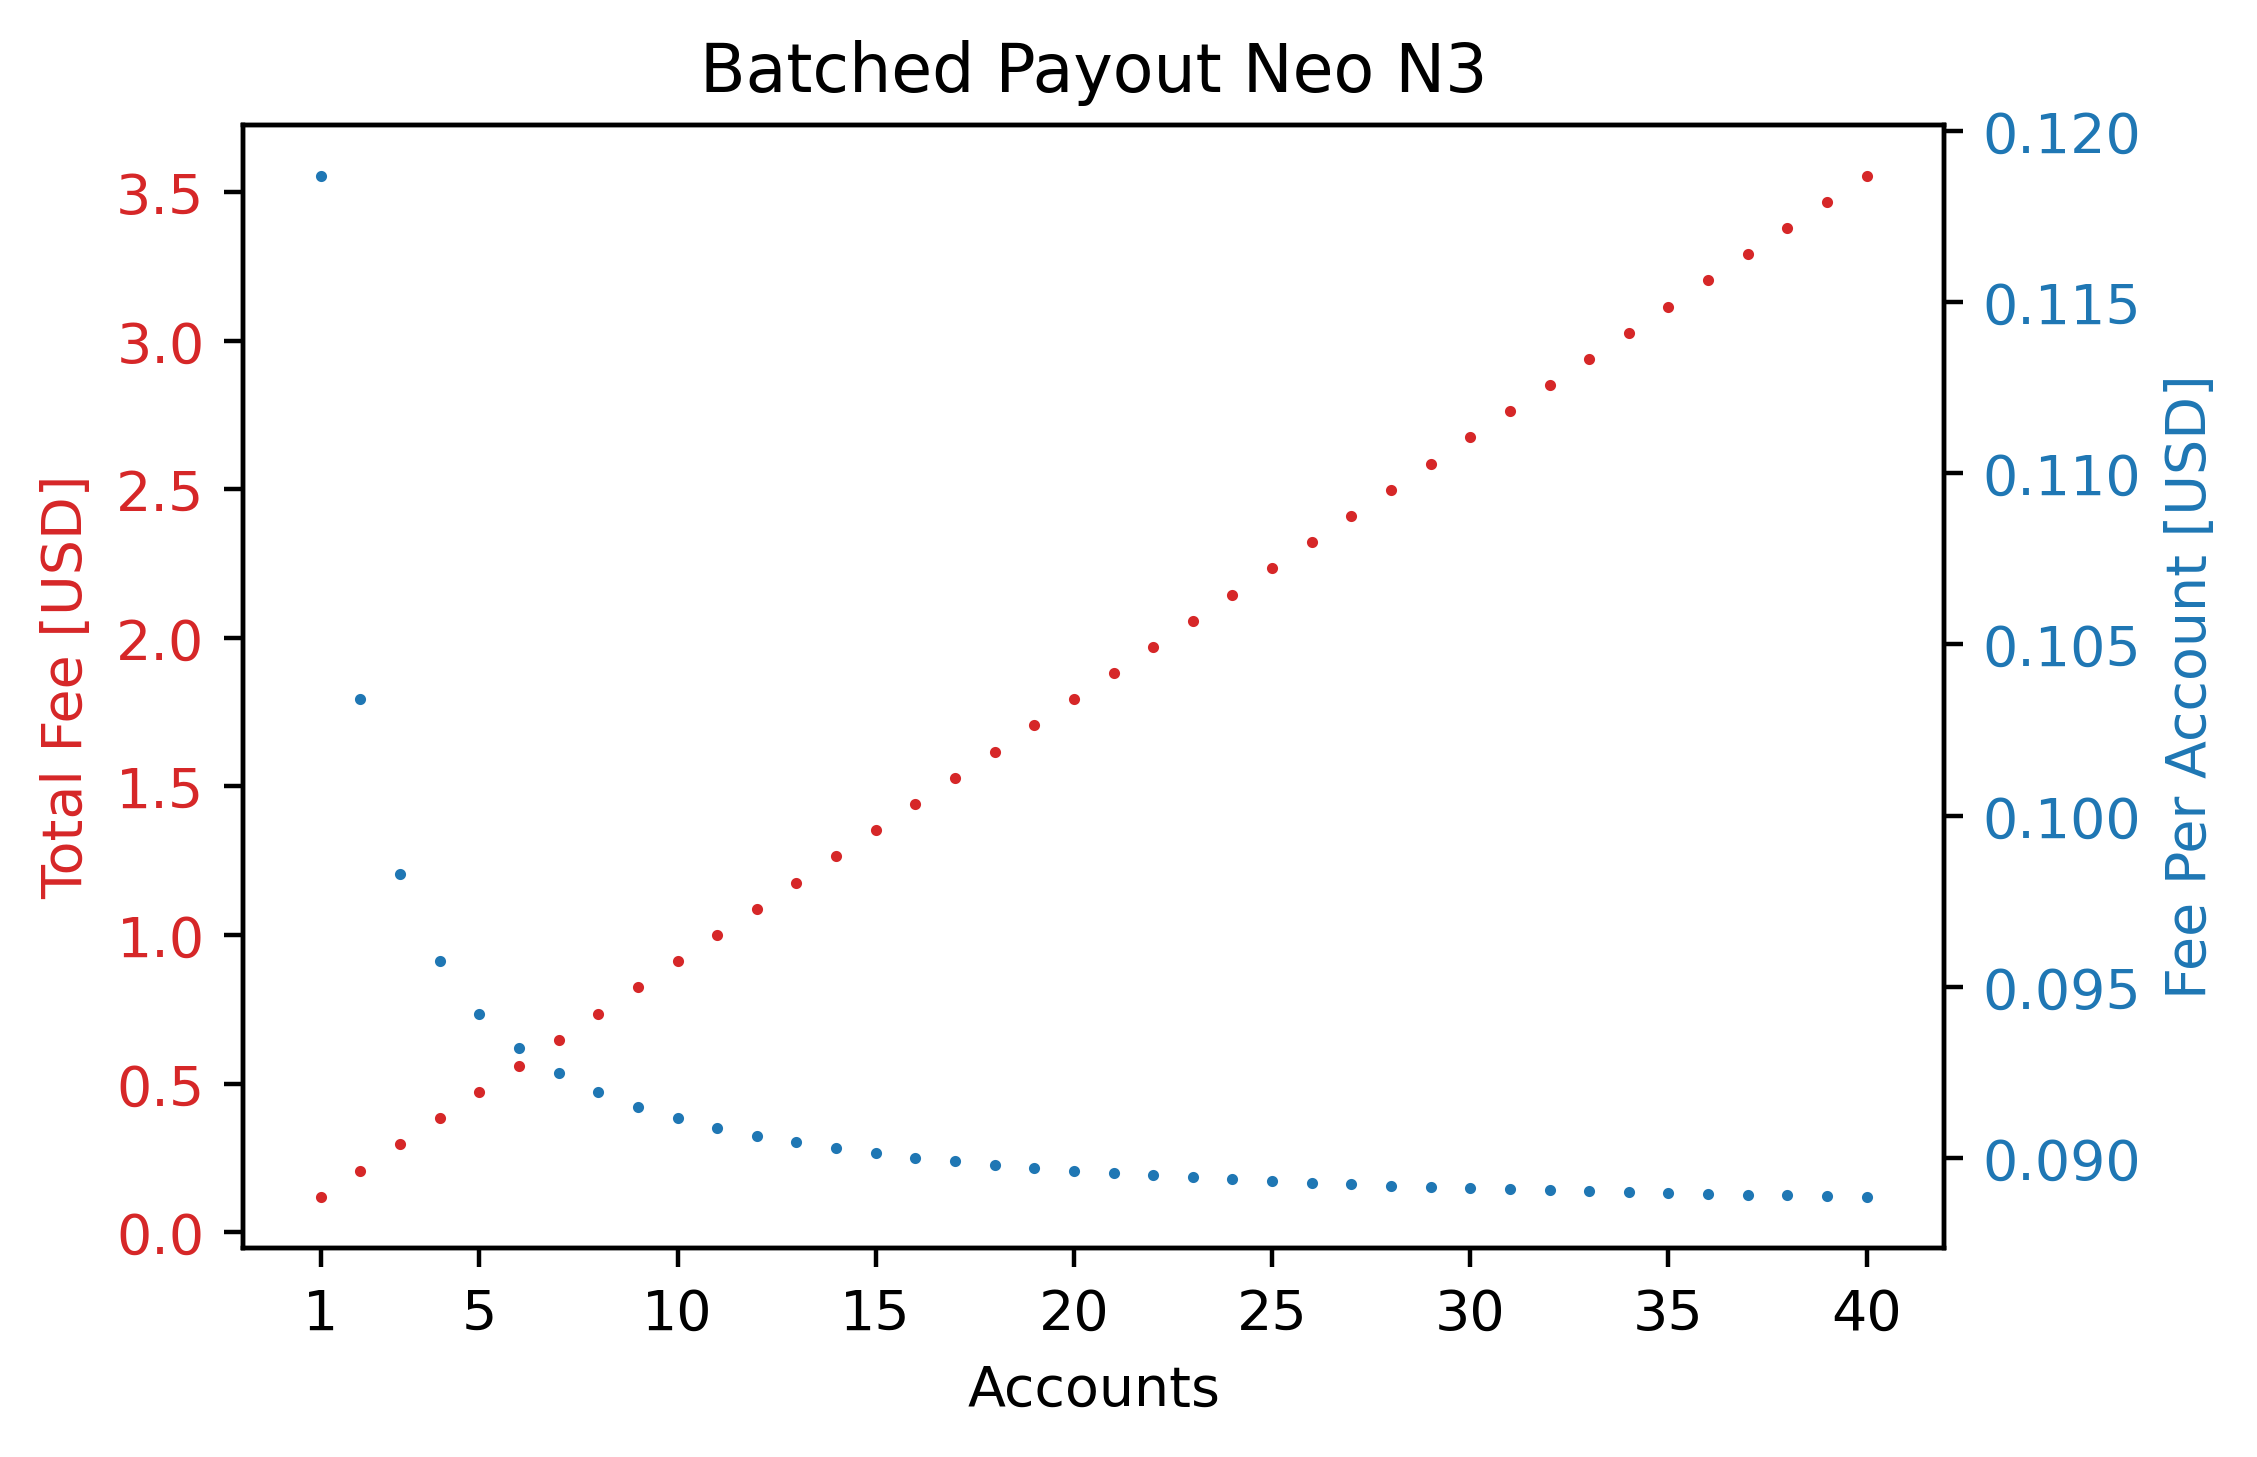

In [18]:
# Plot Neo N3 Batched Payout

safeas = 'neo-batchPayout-40.pdf'
title = 'Batched Payout Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = neoAccounts[:40]
ax1_y = neoBatchTotalUSD[:40]
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = neoAccounts[:40]
ax2_y = neoBatchPerAccountUSD[:40]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 40

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

In [19]:
accountsArrNeo = []
totalFee = []
feePerAccount = []
i = 0
with open(filename) as csvfile:  
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        i+=1
        if i > 1100:
            break
        if i <= 5:
            if i > 4:
                print(row)
            continue
        accountsArr.append(row[0])
        totalFee.append(float(row[3]))
        feePerAccount.append(float(row[6]))

NameError: name 'filename' is not defined

In [ ]:
safeas = 'batchPayout-neo-double.pdf'
title = 'Batched Payout Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [GAS]'
ax1_x = accountsArr
ax1_y = totalFee
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [GAS]'
ax2_x = accountsArr
ax2_y = feePerAccount
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(-1, 1001, 100)
xaxis_ticks[0] = 0
xaxis_ticks[len(xaxis_ticks_1)-1] = 1011

#createDoublePlot(safeas, title, xlabel,
#                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
#                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
#                 xaxis_ticks)

In [ ]:
feePerAccountDollars = []
for i in range(len(feePerAccount)):
    feePerAccountDollars.append(feePerAccount[i] * DOLLARS_PER_GAS)
totalFeeDollars = []
for i in range(len(feePerAccount)):
    totalFeeDollars.append(totalFee[i] * DOLLARS_PER_GAS)

safeas = 'batchPayout-neo-double-usd.pdf'
title = 'Batched Payout Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = accountsArr
ax1_y = totalFeeDollars
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = accountsArr
ax2_y = feePerAccountDollars
ax2_color = 'tab:blue'
xaxis_ticks_1 = np.arange(-1, 1001, 100)
xaxis_ticks_1[0] = 0
xaxis_ticks_1[len(xaxis_ticks_1)-1] = 1011
xaxis_ticks_2 = np.arange(-1, 44, 5)
xaxis_ticks_2[0] = 0
xaxis_ticks_2[len(xaxis_ticks_2)-1] = 39

#createDoublePlotasdf(safeas, title, xlabel,
#                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
#                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
#                 xaxis_ticks_1, xaxis_ticks_2)

In [ ]:
safeas = 'batchPayout-neo-40.pdf'
title = 'Batched Payout Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [GAS]'
ax1_x = accountsArr[:40]
ax1_y = totalFee[:40]
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [GAS]'
ax2_x = accountsArr[:40]
ax2_y = feePerAccount[:40]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(-1, 41, 5)
xaxis_ticks[0] = 0
xaxis_ticks[len(xaxis_ticks)-1] = 39

#createDoublePlot(safeas, title, xlabel,
#                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
#                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
#                 xaxis_ticks)

In [ ]:
feePerAccountDollars = []
for i in range(len(feePerAccount)):
    feePerAccountDollars.append(feePerAccount[i] * DOLLARS_PER_GAS)
totalFeeDollars = []
for i in range(len(feePerAccount)):
    totalFeeDollars.append(totalFee[i] * DOLLARS_PER_GAS)

In [ ]:
safeas = 'batchPayout-neo-40-usd.pdf'
title = 'Batched Payout Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = accountsArr[:40]
ax1_y = totalFee[:40]
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = accountsArr[:40]
ax2_y = feePerAccount[:40]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(-1, 41, 5)
xaxis_ticks[0] = 0
xaxis_ticks[len(xaxis_ticks)-1] = 39

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

fig, ax1 = plt.subplots(dpi=400) # dpi (auflösung)
color = 'tab:red'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Total Fee [USD]', color=color)
ax1.plot(accountsArr, totalFeeDollars, color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Fee per Acount [USD]', color=color)  # we already handled the x-label with ax1
ax2.plot(accountsArr, feePerAccountDollars, color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
xaxis_ticks = np.arange(-1, 1012, 100)
xaxis_ticks[0] = 0
xaxis_ticks[len(xaxis_ticks)-1] = 1011
ax1.set(xticks=xaxis_ticks, title="Batched Payout Neo N3")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/batchPayoutNeo_dollar.pdf')
plt.show()

In [ ]:
fig, ax1 = plt.subplots(dpi=400) # dpi (auflösung)
color = 'tab:red'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Total Fee [USD]', color=color)
ax1.plot(accountsArr[:40], totalFeeDollars[:40], color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Fee per Acount [USD]', color=color)  # we already handled the x-label with ax1
ax2.plot(accountsArr[:40], feePerAccountDollars[:40], color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
xaxis_ticks = np.arange(-1, 40, 5)
xaxis_ticks[0] = 0
xaxis_ticks[len(xaxis_ticks)-1] = 41

xaxis_ticks = np.arange(-1, 40, 5)
xaxis_ticks[0] = 0
ax1.set(xticks=xaxis_ticks, title="Batched Payout Neo N3")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/batchPayoutNeo_40_dollar.pdf')
plt.show()

In [ ]:
eth_filename = 'evaluation_results/eth/eth-batchPayout.csv'

In [ ]:
ethAccountsArr = []
gasCost = []
gasCostPerAccount = []
i = 0
with open(eth_filename) as csvfile:  
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        i+=1
        if i == 1:
            continue
        ethAccountsArr.append(int(row[0]))
        gasCost.append(int(row[1]))
        gasCostPerAccount.append(gasCost[i-2] / ethAccountsArr[i-2])

In [ ]:
fig, ax1 = plt.subplots(dpi=400) # dpi (auflösung)
color = 'tab:red'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Total Gas Cost [gas]', color=color)
ax1.plot(ethAccountsArr, gasCost, color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Gas Cost Per Account [gas]', color=color)  # we already handled the x-label with ax1
ax2.plot(ethAccountsArr, gasCostPerAccount, color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
xaxis_ticks = np.arange(0, 512, 50)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 512
ax2.set(xticks=xaxis_ticks, title="Batched Payout Ethereum")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/batchPayoutEth.pdf')

In [ ]:
fig, ax1 = plt.subplots(dpi=400) # dpi (auflösung)
color = 'tab:red'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Total Gas Cost [gas]', color=color)
ax1.plot(ethAccountsArr[:40], gasCost[:40], color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Gas Cost Per Account [gas]', color=color)  # we already handled the x-label with ax1
ax2.plot(ethAccountsArr[:40], gasCostPerAccount[:40], color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1
ax2.set(xticks=xaxis_ticks, title="Batched Payout Ethereum")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/batchPayoutEth_40.pdf')

In [ ]:
eth_dollarsPerAccount = []
for i in range(len(gasCostPerAccount)):
    eth_dollarsPerAccount.append(gasCostPerAccount[i] * DOLLARs_PRICE_PER_GAS)
eth_totalDollars = []
for i in range(len(gasCost)):
    eth_totalDollars.append(gasCost[i] * DOLLARs_PRICE_PER_GAS)

In [ ]:
fig, ax1 = plt.subplots(dpi=400) # dpi (auflösung)
color = 'tab:red'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Total Cost [USD]', color=color)
ax1.plot(ethAccountsArr, eth_totalDollars, color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cost Per Account [USD]', color=color)  # we already handled the x-label with ax1
ax2.plot(ethAccountsArr, eth_dollarsPerAccount, color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
xaxis_ticks = np.arange(0, 512, 50)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 512
ax2.set(xticks=xaxis_ticks, title="Batched Payout Ethereum")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/batchPayoutEth_dollar.pdf')
plt.show()

In [ ]:
fig, ax1 = plt.subplots(dpi=400) # dpi (auflösung)
color = 'tab:red'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Total Cost [USD]', color=color)
ax1.plot(ethAccountsArr[:40], eth_totalDollars[:40], color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cost Per Account [USD]', color=color)  # we already handled the x-label with ax1
ax2.plot(ethAccountsArr[:40], eth_dollarsPerAccount[:40], color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1
ax2.set(xticks=xaxis_ticks, title="Batched Payout Ethereum")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/batchPayoutEth_40_dollar.pdf')
plt.show()

In [ ]:
former_filename = 'evaluation_results/eth/formerPayout.csv'

In [ ]:
ethAccountsArr = []
gasCost = []
gasCostPerAccount = []
i = 0
with open(former_filename) as csvfile:  
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        i+=1
        if i == 1:
            continue
        if i == 2:
            releaseCost = str(row[0]).split('=')[1]
            continue
        ethAccountsArr.append(int(row[0]))
        gasCost.append(int(row[1]))
        gasCostPerAccount.append((gasCost[i-3] / ethAccountsArr[i-3]))

In [ ]:
eth_dollarsPerAccount = []
for i in range(len(gasCostPerAccount)):
    eth_dollarsPerAccount.append(gasCostPerAccount[i] * DOLLARs_PRICE_PER_GAS)
eth_totalDollars = []
for i in range(len(gasCost)):
    eth_totalDollars.append(gasCost[i] * DOLLARs_PRICE_PER_GAS)

In [ ]:
safeas = 'formerPayoutFill.pdf'
title = 'Former Contract Fill'
xlabel = 'Accounts'
ax1_ylabel = 'Total Gas Cost Fill [USD]'
ax1_x = ethAccountsArr
ax1_y = eth_totalDollars
ax1_color = 'tab:red'
ax2_ylabel = 'Cost Per Account Fill [USD]'
ax2_x = ethAccountsArr
ax2_y = eth_dollarsPerAccount
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 551, 50)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 547

#createDoublePlotasdf(safeas, title, xlabel,
#                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
#                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
#                 xaxis_ticks)

In [ ]:
safeas = 'formerPayoutFill-40.pdf'
title = 'Former Contract Fill'
xlabel = 'Accounts'
ax1_ylabel = 'Total Gas Cost Fill [USD]'
ax1_x = ethAccountsArr[:40]
ax1_y = eth_totalDollars[:40]
ax1_color = 'tab:red'
ax2_ylabel = 'Cost Per Account Fill [USD]'
ax2_x = ethAccountsArr[:40]
ax2_y = eth_dollarsPerAccount[:40]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1

createDoublePlot(safeas, title, xlabel,
           ax1_ylabel, ax1_x, ax1_y, ax1_color,
           ax2_ylabel, ax2_x, ax2_y, ax2_color,
           xaxis_ticks)

In [ ]:
former_preset_filename = 'evaluation_results/eth/formerPayout.csv'

In [ ]:
ethAccountsArr = []
gasCost = []
releaseCost = []
gasCostPerAccount = []
i = 0
with open(former_preset_filename) as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        i+=1
        if i == 1:
            continue
        ethAccountsArr.append(int(row[0]))
        gasCost.append(int(row[1]))
        releaseCost.append(int(row[2]))
        gasCostPerAccount.append((gasCost[i-2] / ethAccountsArr[i-2]))

In [ ]:
eth_dollarsPerAccount = []
for i in range(len(gasCostPerAccount)):
    eth_dollarsPerAccount.append(gasCostPerAccount[i] * DOLLARs_PRICE_PER_GAS)
eth_totalDollars = []
for i in range(len(gasCost)):
    eth_totalDollars.append(gasCost[i] * DOLLARs_PRICE_PER_GAS)

In [ ]:
safeas = 'formerPayoutFill.pdf'
title = 'Former Contract Fill'
xlabel = 'Accounts'
ax1_ylabel = 'Total Gas Cost Fill [USD]'
ax1_x = ethAccountsArr
ax1_y = eth_totalDollars
ax1_color = 'tab:red'
ax2_ylabel = 'Cost Per Account Fill [USD]'
ax2_x = ethAccountsArr
ax2_y = eth_dollarsPerAccount
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 551, 50)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 547

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

#fig, ax1 = plt.subplots(dpi=400) # dpi (auflösung)
#color = 'tab:red'
#ax1.set_xlabel('Accounts')
#ax1.set_ylabel('Total Gas Cost Fill [USD]', color=color)
#ax1.plot(ethAccountsArr, eth_totalDollars, color=color, marker='o', markersize=1, linestyle="None")
#ax1.tick_params(axis='y', labelcolor=color)
#
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#
#color = 'tab:blue'
#ax2.set_ylabel('Cost Per Account Fill [USD]', color=color)  # we already handled the x-label with ax1
#ax2.plot(ethAccountsArr, eth_dollarsPerAccount, color=color, marker=',', markersize=1, linestyle="None")
#ax2.tick_params(axis='y', labelcolor=color)
#xaxis_ticks = np.arange(0, 551, 50)
#xaxis_ticks[0] = 1
#xaxis_ticks[len(xaxis_ticks)-1] = 547
#ax1.set(xticks=xaxis_ticks, title="Former Contract Fill (preset values)")
#
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('plots/formerPayoutFill-preset_test.pdf')
#plt.show()

In [ ]:
fig, ax1 = plt.subplots(dpi=400) # dpi (auflösung)
color = 'tab:red'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Total Gas Cost Fill [USD]', color=color)
ax1.plot(ethAccountsArr[:40], eth_totalDollars[:40], color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cost Per Account Fill [USD]', color=color)  # we already handled the x-label with ax1
ax2.plot(ethAccountsArr[:40], eth_dollarsPerAccount[:40], color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1
ax1.set(xticks=xaxis_ticks, title="Former Contract Fill")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/formerPayoutFill-preset-40.pdf')
plt.show()

In [ ]:
filenameWithdrawSignature = 'evaluation_results/withdraw-signature.csv'

In [ ]:
fig, ax1 = plt.subplots(dpi=400) # dpi (auflösung)
color = 'tab:red'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Total Gas Cost Fill [USD]', color=color)
ax1.plot(ethAccountsArr[:40], eth_totalDollars[:40], color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cost Per Account Fill [USD]', color=color)  # we already handled the x-label with ax1
ax2.plot(ethAccountsArr[:40], eth_dollarsPerAccount[:40], color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1
ax1.set(xticks=xaxis_ticks, title="Former Contract Fill")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/formerPayoutFill-preset-40.pdf')
plt.show()

In [ ]:
filenameWithdrawSignature = 'evaluation_results/withdraw-witness.csv'